### Лабораторная работа 2: Визуализация данных
#### Выполнил студент групы 6131-010402D Кришталь Кирилл

In [1]:
import pandas  as pd
import numpy as np

from matplotlib import pyplot as plt

import random

import seaborn as sns
from scipy import stats

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

### Задание 1
#### Считать в pandas.DataFrame любой источник данных

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().any().any()

False

### Задание 2
#### Привести описание датасета:

##### Набор данных о ценах на жилье, содержащий подробную информацию о таких объектах, как спальни, ванные комнаты и местоположение, идеально подходит для прогнозного моделирования цен. Он также поддерживает анализ рыночных тенденций и разработку системы рекомендаций для покупателей, что делает его незаменимым для эффективного принятия решений в сфере недвижимости. 

### Задание 3. matplotlib:

#### Построить несколько графиков разного вида с использованием matplotlib.
#### Построить несколько суб-графиков на одном графике используя .subplot.
#### Построить интерактивный график со слайдером.
#### Графики должны быть разных видов.
#### Хотя бы в одном графике необходимо подписать оси.
#### Во всех графиках необходимо указать название.
#### Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.

### несколько графиков разного вида

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '−250'),
  Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

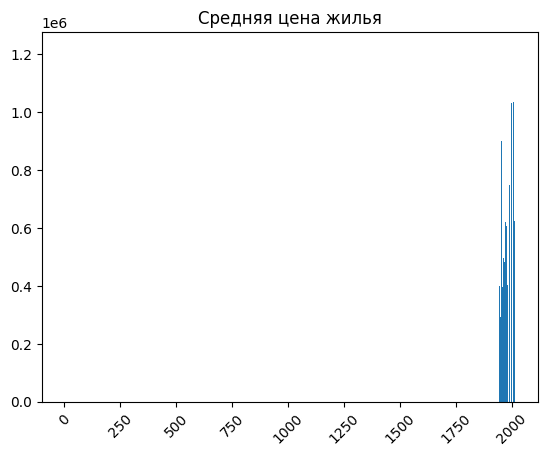

In [6]:
bar_data = df.groupby('yr_renovated', as_index=False).agg({'price': 'mean'})
plt.bar(x=bar_data['yr_renovated'], height=bar_data['price'])
plt.title('Средняя цена жилья')
plt.xticks(rotation=45)

### Построим диаграмму рассеивания между стоимостью жилья и жилой площадью

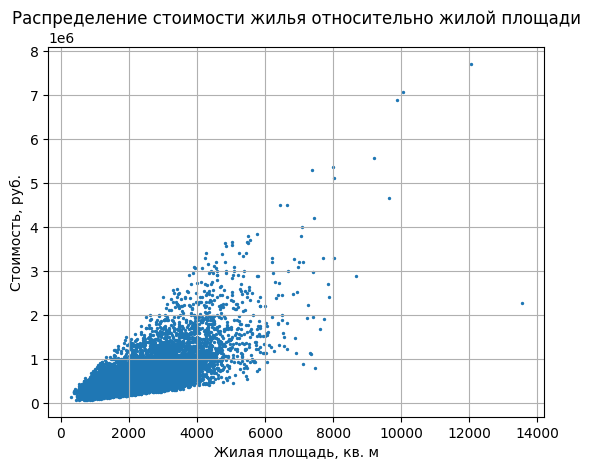

In [7]:
plt.scatter(x=df['sqft_living'], y=df['price'], s=2)
plt.title('Распределение стоимости жилья относительно жилой площади')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Стоимость, руб.')
plt.grid()

### Построим график зависимости стоимости жилья от даты постройки

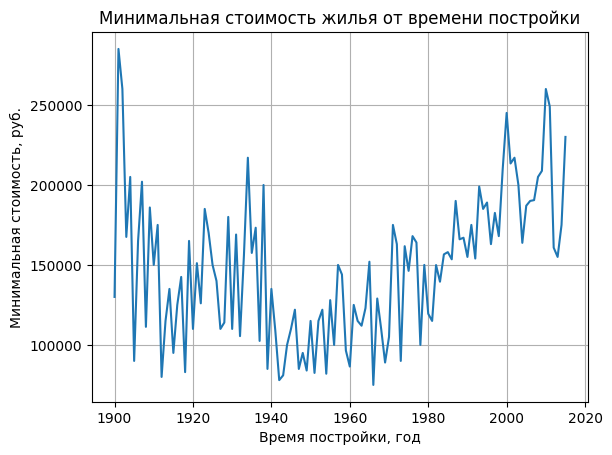

In [8]:
plot_data = df.groupby('yr_built', as_index=False).agg({'price': 'min'})
plt.plot(plot_data['yr_built'], plot_data['price'])
plt.title('Минимальная стоимость жилья от времени постройки')
plt.xlabel('Время постройки, год')
plt.ylabel('Минимальная стоимость, руб.')
plt.grid()

### несколько суб-графиков на одном графике используя .subplot

#### Построим серию графиков минимальной стоимости жилья от времени постройки в разрезе жилой площади

In [9]:
df_sub = df.groupby(['yr_built', 'sqft_living'], as_index=False).agg({'price': 'min'})
df_sub

yr_built  sqft_living      price
0          1900          600   130000.0
1          1900          620   382888.0
2          1900          760   415000.0
3          1900          910   169900.0
4          1900          920   285000.0
...         ...          ...        ...
14064      2015         4000   771005.0
14065      2015         4010  1150000.0
14066      2015         4360  1289990.0
14067      2015         4460   490000.0
14068      2015         5640  1999950.0

[14069 rows x 3 columns]

<Figure size 2500x1000 with 0 Axes>

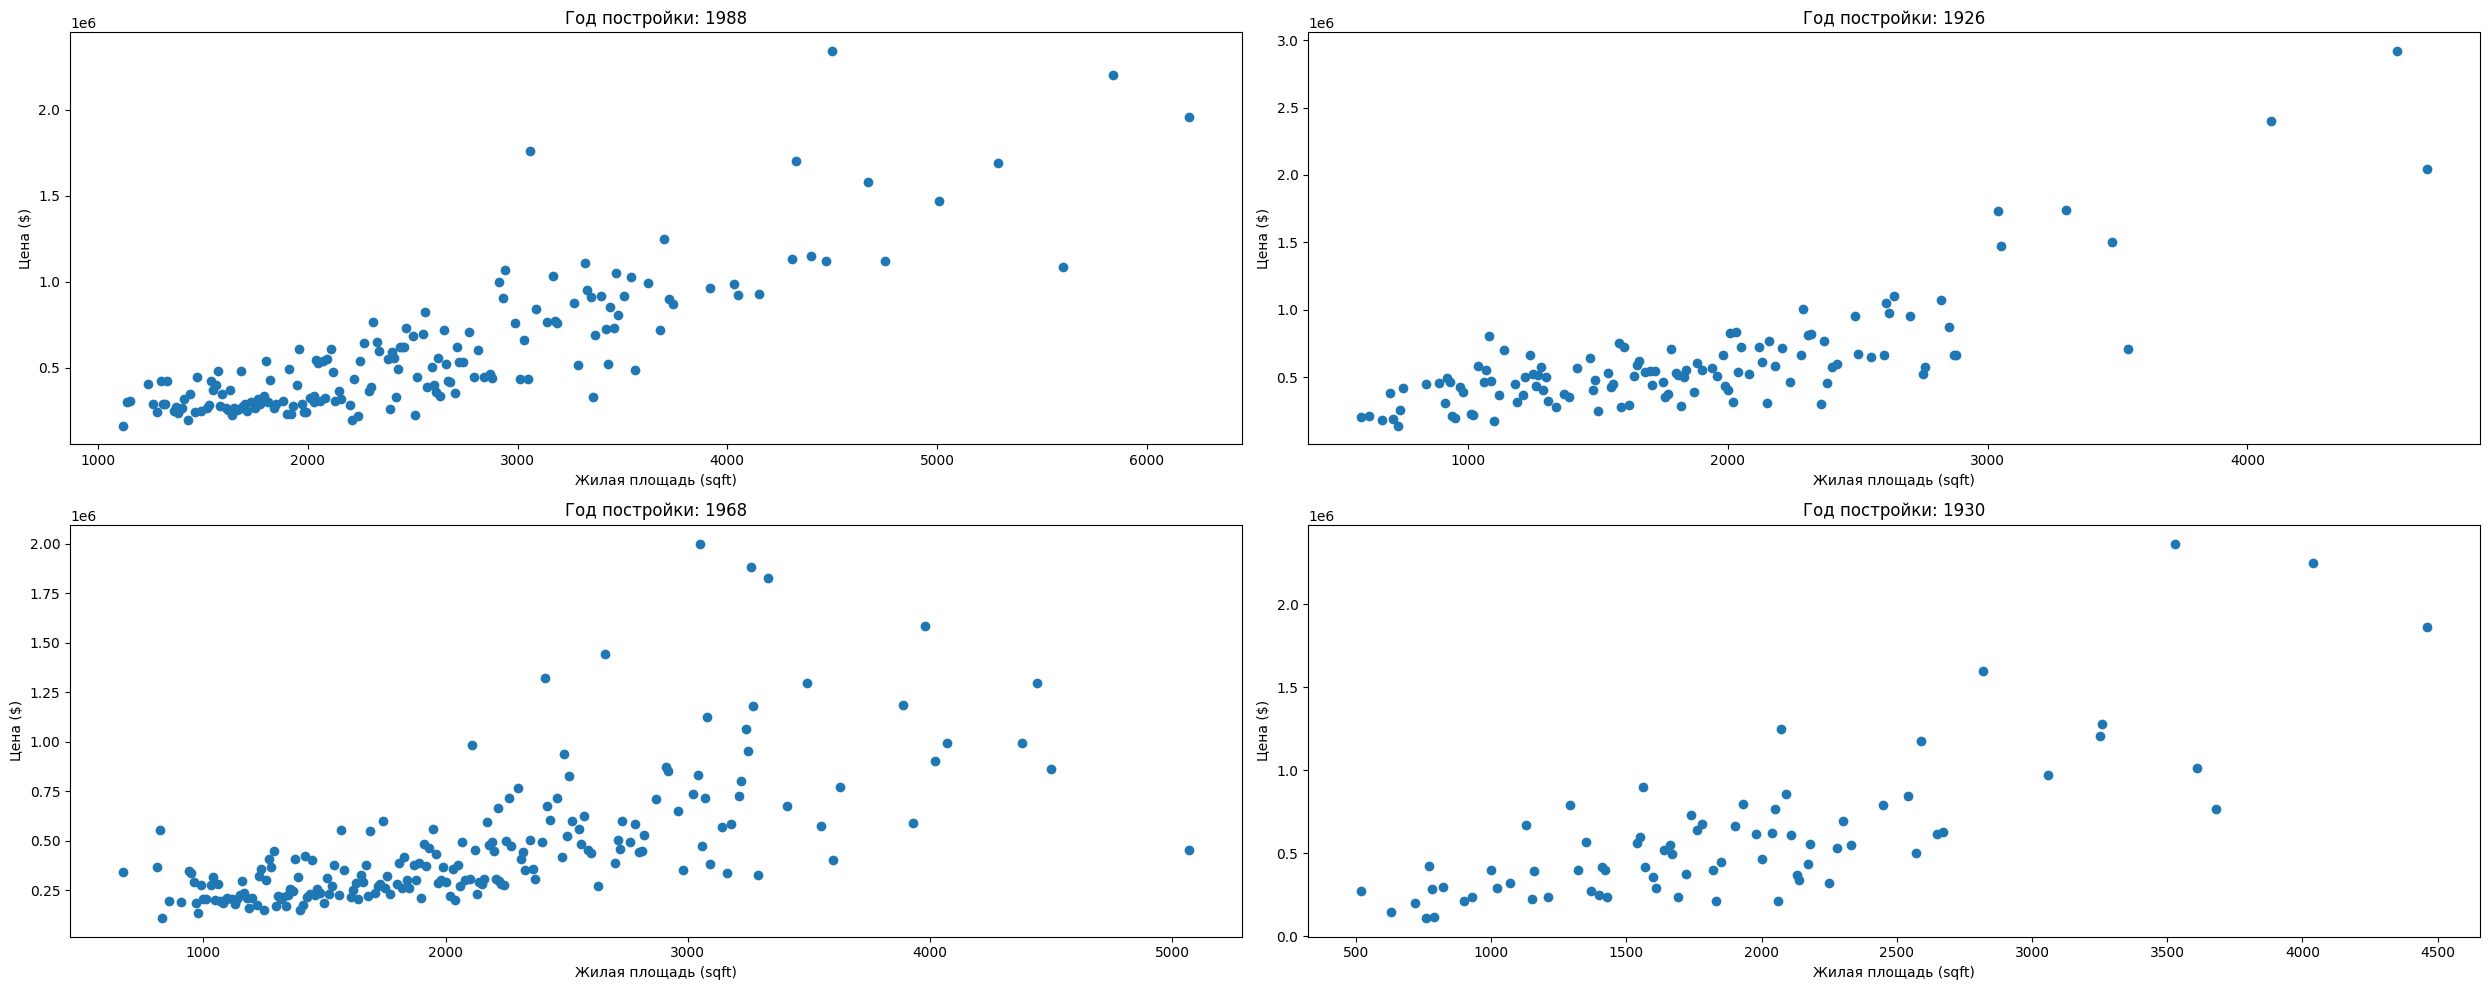

In [10]:
plt.figure(figsize=(25, 10))

types = df_sub['yr_built'].unique()

types_subset = random.sample(list(types), 4)

# Создаем графики
plt.figure(figsize=(25, 10))
for i in range(len(types_subset)):
    sp1 = plt.subplot(2, 2, i+1)
    subdf = df_sub[df_sub['yr_built'] == types_subset[i]]
    plt.plot(subdf['sqft_living'], subdf['price'], 'o')
    plt.title(f'Год постройки: {types_subset[i]}')
    plt.xlabel('Жилая площадь (sqft)')
    plt.ylabel('Цена ($)')
    
plt.tight_layout()
plt.show()

### Построить интерактивный график со слайдером.
##### Создадим следующий интерактивный график: пусть по оси X будет жилая площадь, по оси Y - средняя стоимость жилья, а сами графики будут для типа жилья с количеством ванных комнат

In [11]:
showdf = df.groupby(['bathrooms', 'sqft_living'])['price'].mean().reset_index()
showdf.columns = ['bathrooms', 'sqft_living', 'price']
showdf

bathrooms  sqft_living      price
0          0.00          290   142000.0
1          0.00          600   280000.0
2          0.00          670    75000.0
3          0.00          690   484000.0
4          0.00          844   139950.0
...         ...          ...        ...
3626       6.75         9640  4668000.0
3627       7.50         4050   450000.0
3628       7.75         9890  6885000.0
3629       8.00        12050  7700000.0
3630       8.00        13540  2280000.0

[3631 rows x 3 columns]

In [12]:
import plotly.express as px

# Пример данных
showdf = df.groupby(['bathrooms', 'sqft_living'])['price'].mean().reset_index()
showdf.columns = ['bathrooms', 'sqft_living', 'price']

# Создание интерактивного графика с добавленным слайдером
fig = px.scatter(showdf, x='sqft_living', y='price', color='bathrooms',
                 title='Средняя стоимость жилья в зависимости от жилой площади и количества ванных комнат',
                 labels={'sqft_living': 'Жилая площадь (sqft)', 'price': 'Средняя стоимость ($)', 'bathrooms': 'Ванные комнаты'},
                 hover_data=['bathrooms'],
                 animation_frame='bathrooms')

# Настройка осей
fig.update_layout(
    xaxis=dict(title='Жилая площадь (sqft)'),
    yaxis=dict(title='Средняя стоимость ($)'),
)

# Отображение графика
fig.show()


### Задание 4. pandas:

#### Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot. 
#### Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой)
#### Графики должны быть построены как через методы DataFrame, так и через методы Series. 
#### То есть оба варианта нужно продемонстрировать. 

Построим Boxplot класса жилья для каждого вида из окна жилья

<Axes: title={'center': 'view'}, xlabel='grade'>

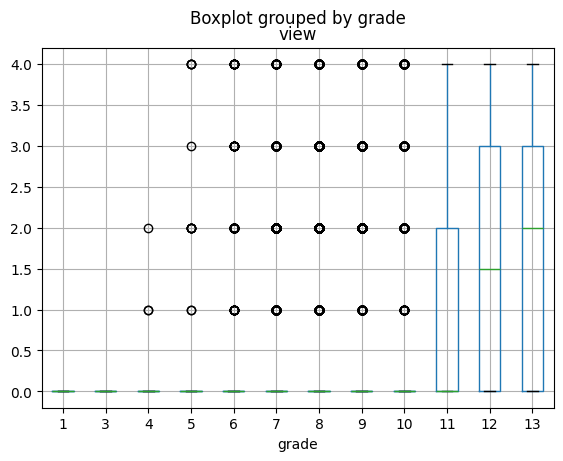

In [13]:
df.boxplot(by='grade', column='view')

#### С помощью Series отрисуем общий boxplot для Kitchen area

<Axes: >

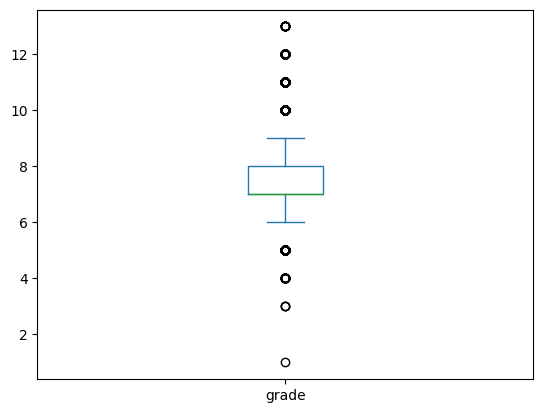

In [14]:
s = df['grade']
s.plot(kind='box')

#### Нарисуем гистограмму вида с жилья для каждого класса отделки

array([[<Axes: title={'center': '(1,)'}>,
        <Axes: title={'center': '(3,)'}>,
        <Axes: title={'center': '(4,)'}>],
       [<Axes: title={'center': '(5,)'}>,
        <Axes: title={'center': '(6,)'}>,
        <Axes: title={'center': '(7,)'}>],
       [<Axes: title={'center': '(8,)'}>,
        <Axes: title={'center': '(9,)'}>,
        <Axes: title={'center': '(10,)'}>],
       [<Axes: title={'center': '(11,)'}>,
        <Axes: title={'center': '(12,)'}>,
        <Axes: title={'center': '(13,)'}>]], dtype=object)

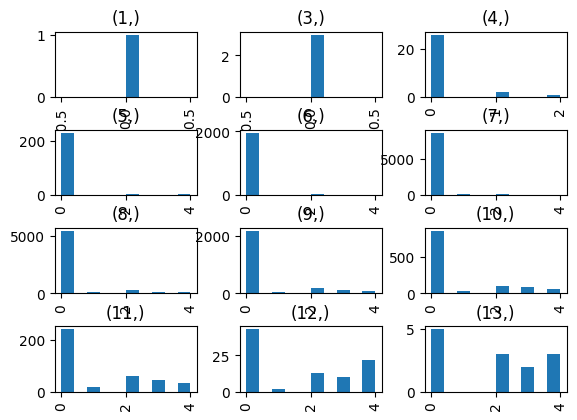

In [15]:
df.hist(column='view', by=['grade'])

#### Через Series построим общую гистограмму вида из жилья

<Axes: >

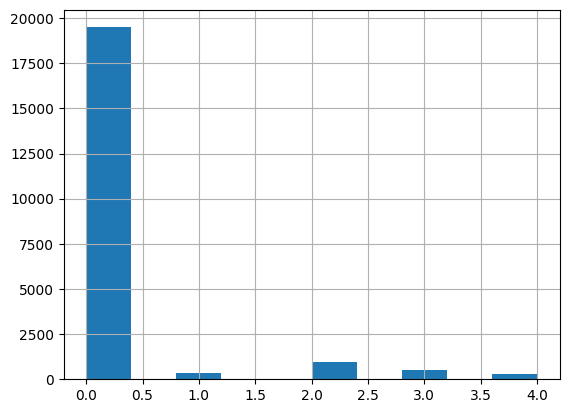

In [16]:
df['view'].hist()

#### Построим круговую диаграмму распределения жилья по количеству спален

<Axes: ylabel='count'>

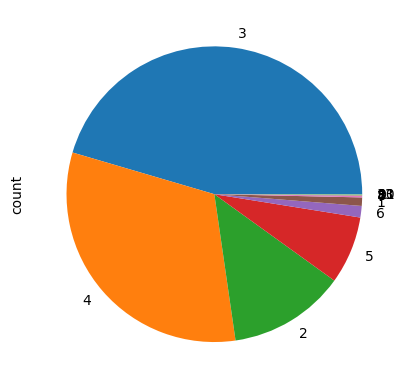

In [17]:
df['bedrooms'].value_counts().plot(kind='pie')

### Задание 5. seaborn:

#### Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

#### Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

#### Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

#### Построить график .heatmap попарной корреляции всех числовых признаков.

#### Категориальные признаки необходимо убрать из датафрейма перед построением

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

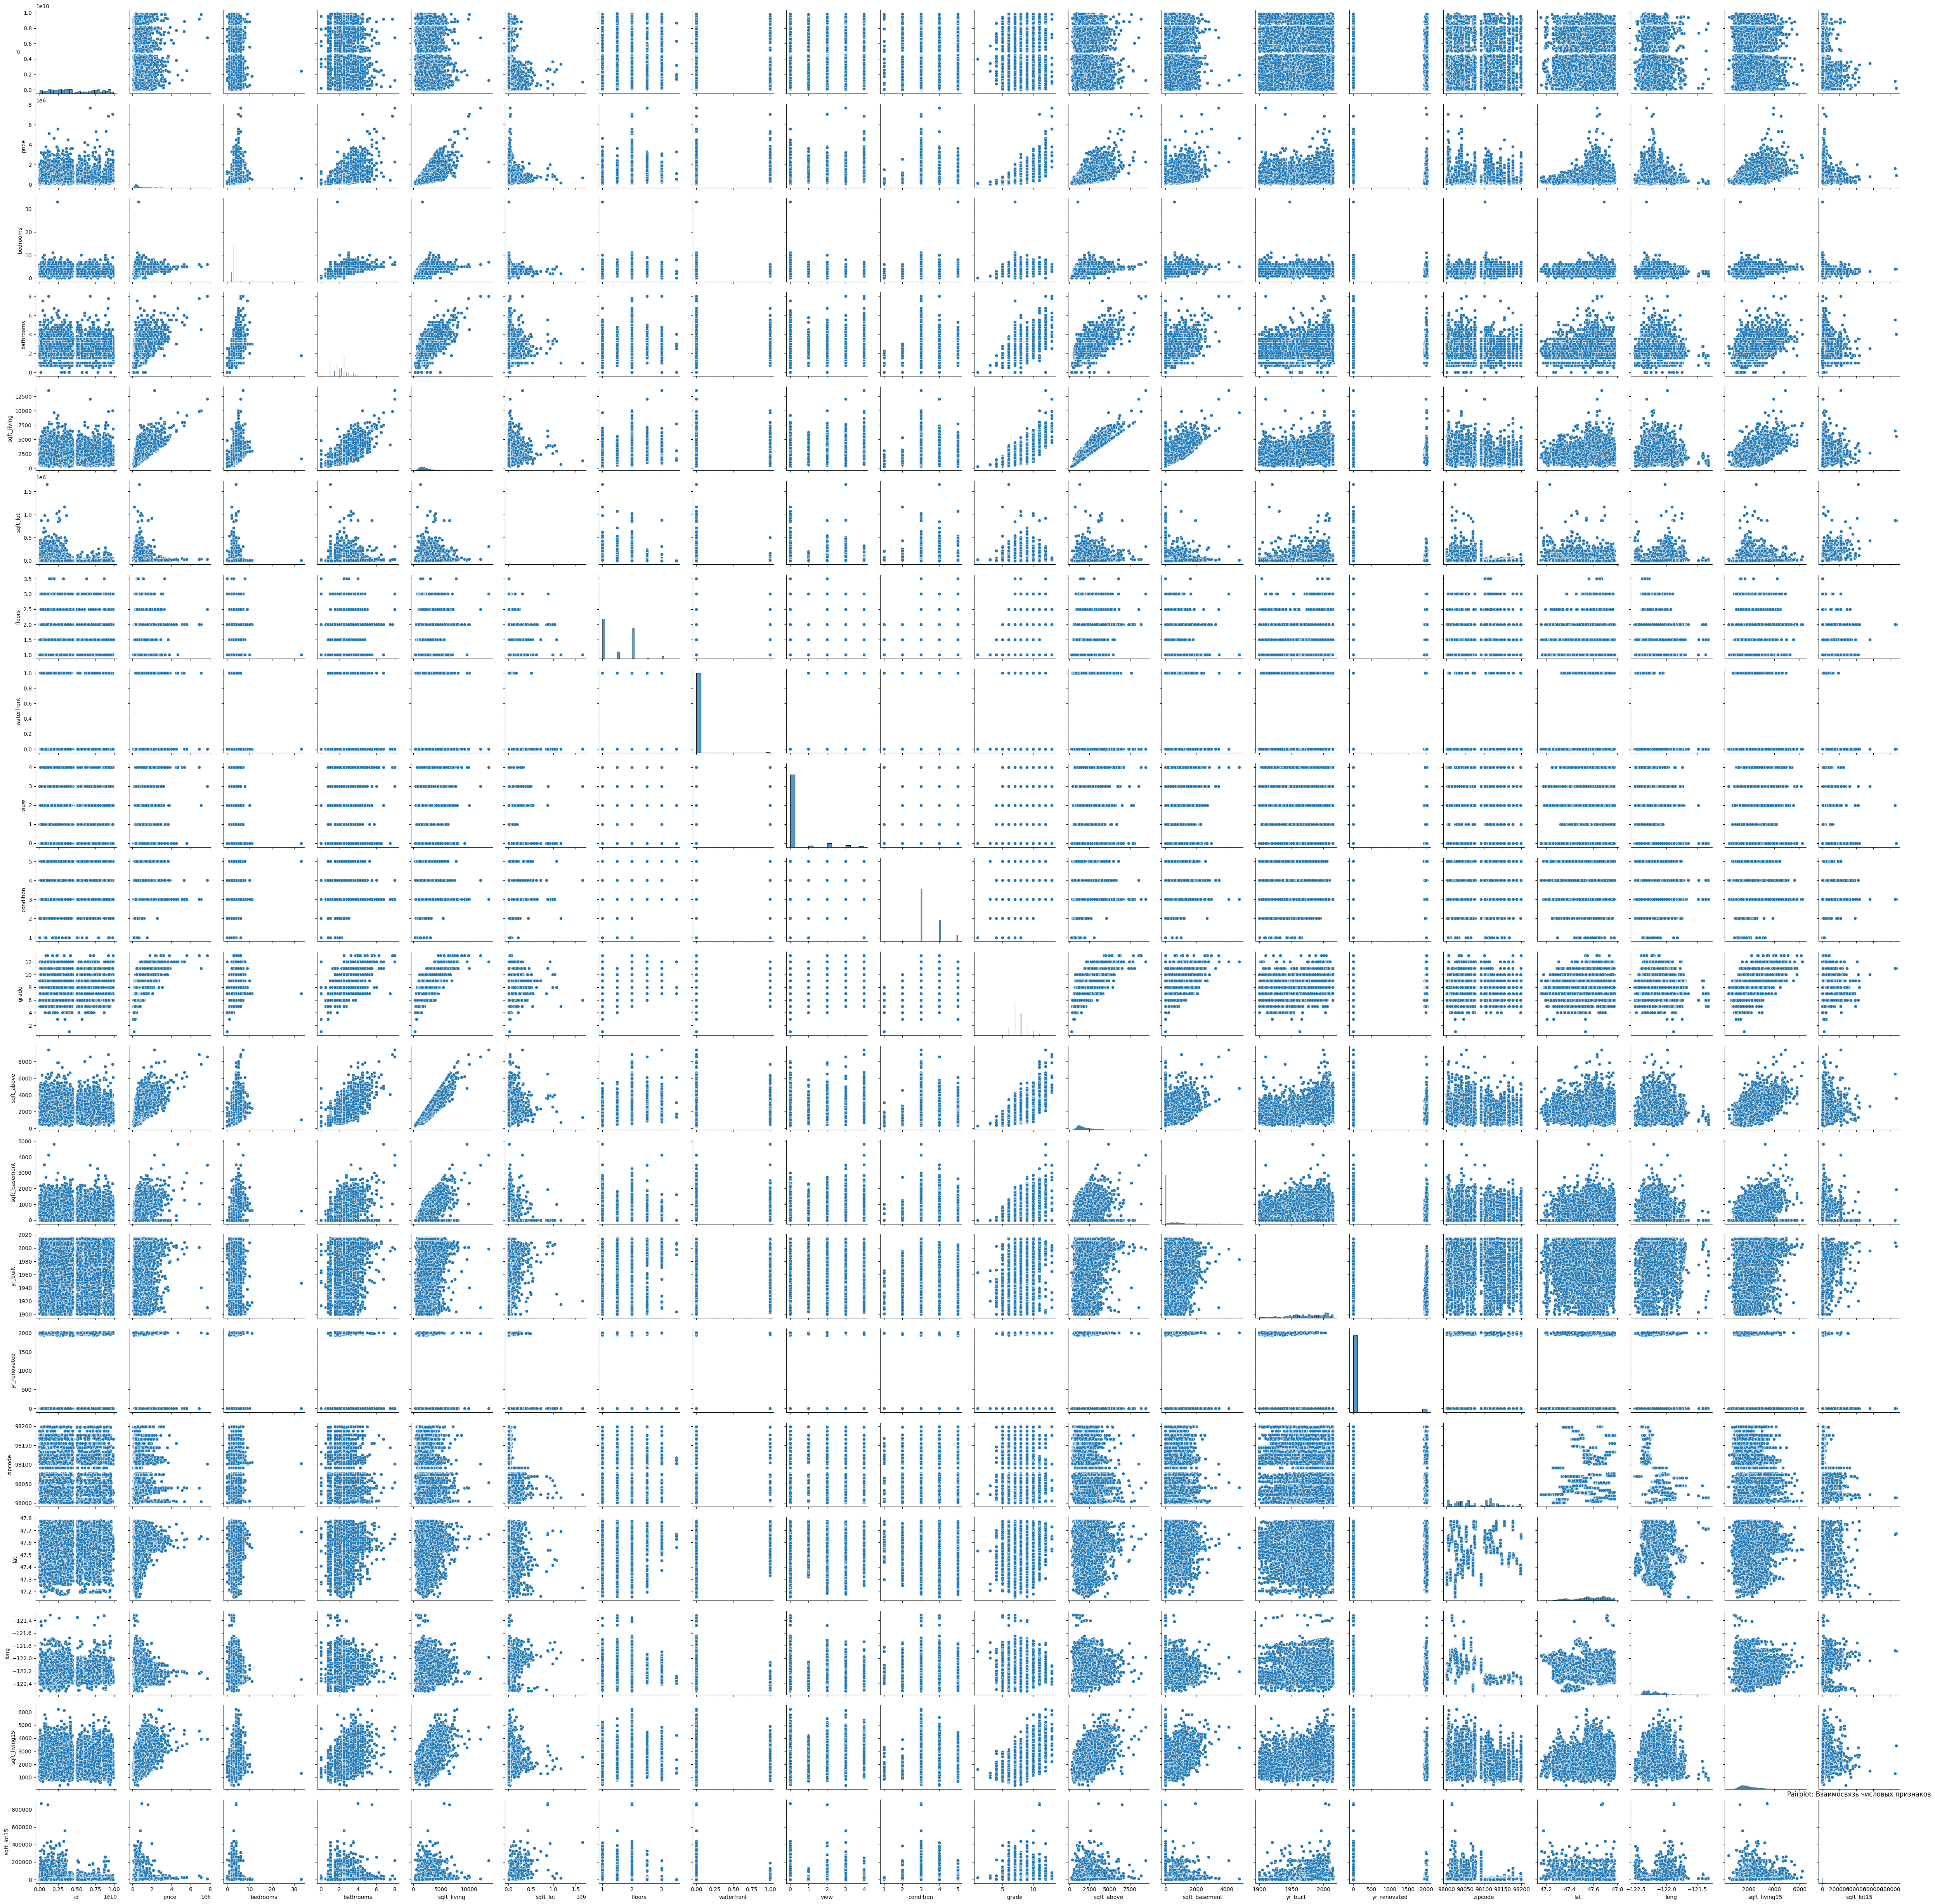

In [18]:
# Построение pairplot
sns.pairplot(df)
plt.title('Pairplot: Взаимосвязь числовых признаков')
plt.show()

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

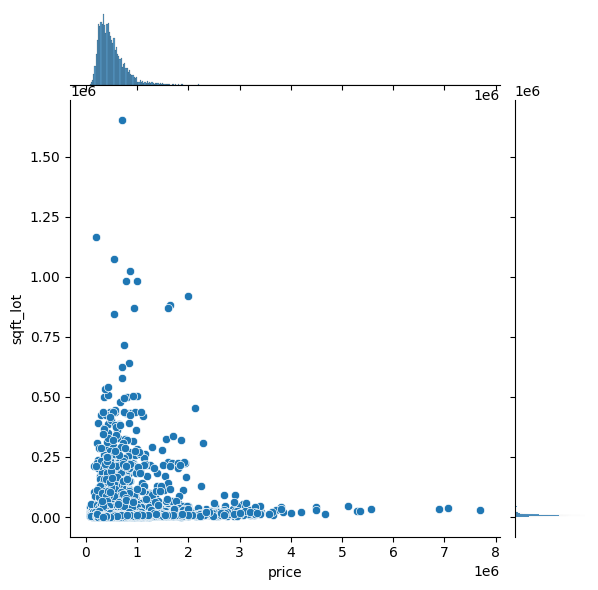

In [19]:
sns.jointplot(df, x='price', y='sqft_lot')

Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

In [20]:
available_types = ['apartment', 'house', 'townhouse', 'cottage']

df['Apartment type'] = [random.choice(available_types) for _ in range(len(df))]


<Axes: xlabel='Apartment type', ylabel='sqft_living'>

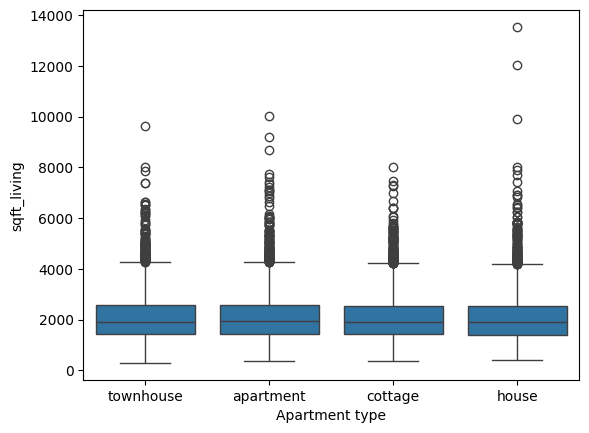

In [21]:
sns.boxplot(df, x='Apartment type', y='sqft_living')

<Axes: xlabel='Apartment type', ylabel='sqft_living'>

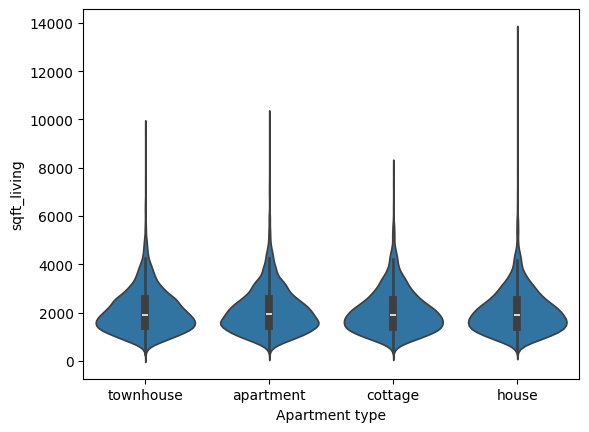

In [22]:
sns.violinplot(df, x='Apartment type', y='sqft_living')

Построить график .heatmap попарной корреляции всех числовых признаков.

<Axes: >

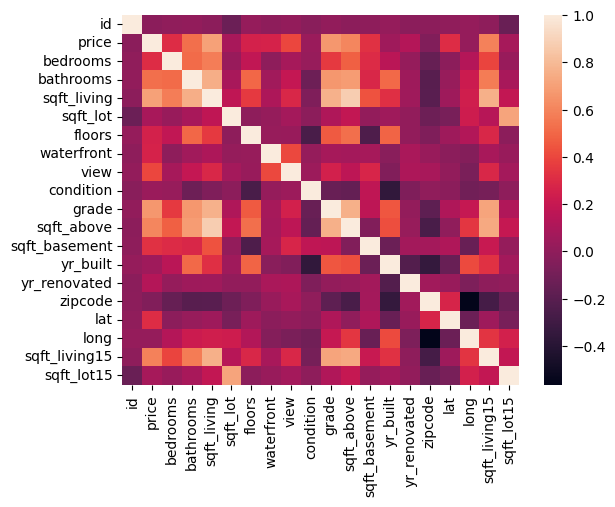

In [23]:
feat = ["date", "Apartment type"]
droped = df.drop(feat, axis = 1)

sns.heatmap(droped.corr())

### Задание 6. scipy.stats:

#### Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

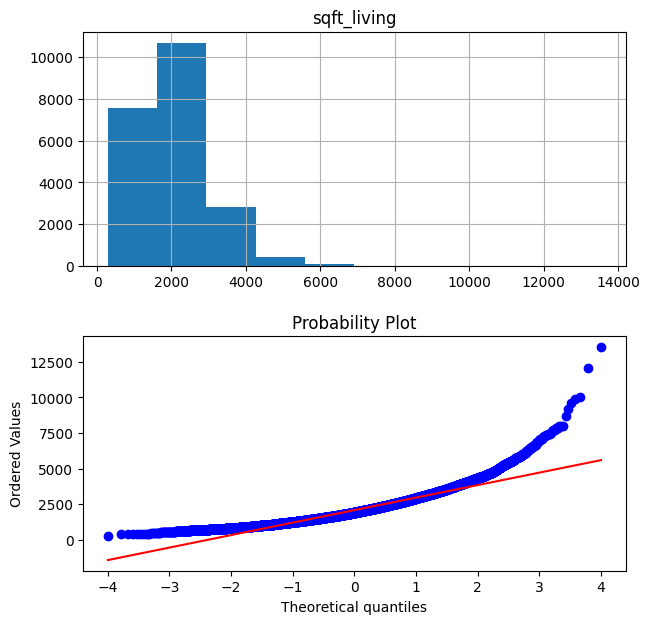

In [24]:
fig_p, ax_p = plt.subplots(2, 1, figsize=(7, 7))
stats.probplot(df['sqft_living'], dist="norm", plot=plt)
plt.subplot(2, 1, 2)
df.hist(ax=ax_p[0], column='sqft_living')
plt.show()

### Задание 7. plotly:

#### Построить несколько графиков разного вида.

#### Построить несколько суб-графиков на одном графике.

#### Построить интерактивный график.

#### Использование Dash опционально.

In [25]:
df_bar = df.groupby('yr_built', as_index=False).agg({'price': 'mean'})
fig = px.histogram(df_bar, x="yr_built", y='price')
fig.show()

In [26]:
fig = px.scatter(df, 'sqft_living', 'price')
fig.show()

In [27]:
plot_data = df.groupby('Apartment type', as_index=False).agg({'price': 'min'})
fig = px.line(plot_data, 'Apartment type', 'price')
fig.show()

несколько суб-графиков на одном графике используя .subplot

In [28]:
multyplot_data = df.groupby(['yr_built', 'sqft_living'], as_index=False).agg({'price': 'min'})
types = multyplot_data['yr_built'].unique()

# Преобразование целочисленных значений в строки
types_str = [str(t) for t in types]

# Создание графиков
fig = make_subplots(rows=2, cols=2, subplot_titles=types_str)

for i in range(2):
    for j in range(2):
        subdf = multyplot_data[multyplot_data['yr_built'] == types[i*2+j]]
        fig.add_trace(go.Scatter(x=subdf['sqft_living'], y=subdf['price'], mode='lines'), row=i+1, col=j+1)

fig.show()

### Построить интерактивный график со слайдером.
#### Создадим следующий интерактивный график: пусть по оси X будет жилая площадь, по оси Y - средняя стоимость жилья, а сами графики будут для каждого типа отделки

In [29]:
showdf = df.groupby(['yr_built', 'sqft_living'])['price'].mean().reset_index()
showdf.columns = ['yr_built', 'sqft_living', 'price']

In [30]:
fig = go.Figure()

types = showdf['yr_built'].unique()

for i in range(types.shape[0]):
    subdf = showdf[showdf['yr_built'] == types[i]]
    fig.add_trace(go.Scatter(x=subdf['sqft_living'], y=subdf['price'], name=str(types[i])))

fig.update_layout(
    title_text='Стоимость жилья',
    title_x=0.5,
    legend_title='Время постройки',
    legend=dict(orientation="v", y=0.5, x=1.025)
)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type='linear'
    ),
    autosize=False,
    width=1300,
    height=800,
)

fig.show()
